<a href="https://colab.research.google.com/github/dheyvinafaa/Machine-Learning/blob/main/evalusi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import csv file
from pandas import DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv("/content/peminjaman buku - buku perpus.csv")
df

,lama_pinjam,kode_pinjam,kode_buku,jumlah_pinjam,kode_denda,kode_member,kode_mahasiswa,jumlah_pengembalian,denda_pengembalian
0,12,A32,A43,2073,A62,A73,A173,1,1
1,24,A33,A42,2333,A65,A72,A172,1,1
2,27,A33,A41,5965,A61,A75,A174,1,1
3,12,A32,A43,1262,A61,A73,A173,1,1
4,18,A32,A41,3378,A65,A73,A173,1,1
...,...,...,...,...,...,...,...,...,...
95,21,A34,A42,2288,A61,A72,A173,1,1
96,48,A31,A49,3566,A62,A74,A173,1,1
97,6,A34,A40,860,A61,A75,A173,1,1
98,12,A34,A40,682,A62,A74,A173,1,1


In [ ]:
import random
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel

df = df[(np.abs(stats.zscore(df["lama_pinjam"])) < 3)]

income_1 = df[df['denda_pengembalian']==1]['lama_pinjam']
income_0 = df[df['denda_pengembalian']==2]['lama_pinjam']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("Ho Ditolak")
else:
    print("Ho Diterima")

ttest 0.06693161223797418
p value 0.9473751236883828
Ho Diterima


In [ ]:
import random
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel

df = df[(np.abs(stats.zscore(df["jumlah_pinjam"])) < 3)]

income_1 = df[df['denda_pengembalian']==1]['jumlah_pinjam']
income_0 = df[df['denda_pengembalian']==2]['jumlah_pinjam']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("Ho Ditolak")
else:
    print("Ho Diterima")

ttest -2.587268305290784
p value 0.022081653624206915
Ho Ditolak


In [ ]:
import random
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel

df = df[(np.abs(stats.zscore(df["jumlah_pengembalian"])) < 3)]

income_1 = df[df['denda_pengembalian']==1]['jumlah_pengembalian']
income_0 = df[df['denda_pengembalian']==2]['jumlah_pengembalian']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("Ho Ditolak")
else:
    print("Ho Diterima")

ttest -1.095445115010332
p value 0.2900334160014487
Ho Diterima


In [ ]:
def bar_chart(feature):
    accepted = df[df['denda_pengembalian']==1][feature].value_counts()
    rejected = df[df['denda_pengembalian']==2][feature].value_counts()
    df1 = pd.DataFrame([accepted, rejected])
    df1.index=['accepted', 'rejected']
    df1.plot(kind='bar',stacked=True,fig=(18,6),title=feature)
   

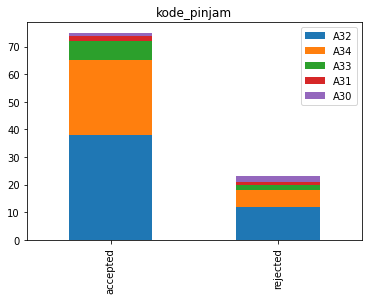

In [ ]:
 bar_chart('kode_pinjam')

In [ ]:
c_t = pd.crosstab(df['kode_pinjam'], df['denda_pengembalian'], margins = False)
c_t

denda_pengembalian,1,2
kode_pinjam,,
A30,1,2
A31,2,1
A32,38,12
A33,7,2
A34,27,6


In [ ]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p value', p)
print(expected)
prob = 0.99
critical = chi2.ppf(prob, dof)
print('probabilitas=%.3f, critical=%.3f, stat=%3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('dependent (tolak H0)')
else:
    print('independent (terima H0)')

dof=4
p value 0.43253755219339995
[[ 2.29591837  0.70408163]
 [ 2.29591837  0.70408163]
 [38.26530612 11.73469388]
 [ 6.8877551   2.1122449 ]
 [25.25510204  7.74489796]]
probabilitas=0.990, critical=13.277, stat=3.808535
independent (terima H0)
